<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#전처리" data-toc-modified-id="전처리-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>전처리</a></span></li><li><span><a href="#시각화-setting" data-toc-modified-id="시각화-setting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>시각화 setting</a></span></li><li><span><a href="#고객별-데이터-분석" data-toc-modified-id="고객별-데이터-분석-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>고객별 데이터 분석</a></span><ul class="toc-item"><li><span><a href="#transaction_amount가-많은-고객-list" data-toc-modified-id="transaction_amount가-많은-고객-list-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>transaction_amount가 많은 고객 list</a></span></li><li><span><a href="#B2C-강의만-뽑은-DataFrame" data-toc-modified-id="B2C-강의만-뽑은-DataFrame-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>B2C 강의만 뽑은 DataFrame</a></span></li></ul></li><li><span><a href="#Top-10:-B2C-Loyal-customer" data-toc-modified-id="Top-10:-B2C-Loyal-customer-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Top 10: B2C Loyal customer</a></span><ul class="toc-item"><li><span><a href="#1.98685:-만능인-or-B2B?" data-toc-modified-id="1.98685:-만능인-or-B2B?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>1.98685: 만능인 or B2B?</a></span></li><li><span><a href="#50769-:-개발자를-꿈꾸는-취준-이직생" data-toc-modified-id="50769-:-개발자를-꿈꾸는-취준-이직생-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>50769 : 개발자를 꿈꾸는 취준 이직생</a></span></li><li><span><a href="#538965:-프로일잘러-꿈꾸는-직장인" data-toc-modified-id="538965:-프로일잘러-꿈꾸는-직장인-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>538965: 프로일잘러 꿈꾸는 직장인</a></span></li></ul></li><li><span><a href="#Popular-categories-of-Top10" data-toc-modified-id="Popular-categories-of-Top10-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Popular categories of Top10</a></span></li></ul></div>

# 전처리

In [2]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from PIL import Image

In [5]:
# 데이터 로딩 및 확인
df = pd.read_excel('/content/drive/MyDrive/패캠 PJT/패캠_raw.xlsx')
df.head()

id  customer_id  course_id     type      state  \
0  970634     504760.0   201435.0    ORDER  CANCELLED   
1  970650     432862.0   203178.0    ORDER  CANCELLED   
2  970657      72297.0   204246.0  PAYMENT  COMPLETED   
3  970656      72297.0   204246.0    ORDER  CANCELLED   
4  970658     478028.0   201797.0  PAYMENT  COMPLETED   

                    course_title category_title  format        completed_at  \
0      올인원 패키지 : 알고리즘 기술면접 완전 정복          프로그래밍     올인원 2021-03-28 15:00:11   
1    초격차 패키지 : 한번에 끝내는 영상 촬영과 편집          영상/3D     올인원 2021-03-28 15:16:53   
2           시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 15:21:43   
3           시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 15:21:43   
4  올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX         업무 생산성     올인원 2021-03-28 15:21:54   

   transaction_amount              coupon_title  coupon_discount_amount  \
0               90500                       NaN                     NaN   
1               96000                       NaN                     NaN   
2              171810     [10% 할인] 시크릿코드 실무 완성편                 19090.0   
3              171810                       NaN                     NaN   
4               97500  [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0   

   sale_price  tax_free_amount   pg method subcategory_title  \
0    110500.0         110500.0  NaN  VBANK           개발자 커리어   
1    116000.0         116000.0  NaN   CARD             영상 편집   
2    190900.0         190900.0  NaN   CARD               NaN   
3    190900.0         190900.0  NaN   CARD               NaN   
4    117500.0         117500.0  NaN   CARD           PPT/보고서   

  marketing_start_at  
0                NaT  
1         2020-12-02  
2         2021-03-04  
3         2021-03-04  
4         2019-11-14

In [7]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로딩 및 확인
df = pd.read_excel('/content/drive/MyDrive/패캠 PJT/패캠_raw.xlsx')
df.head()

# 1. type
## payment 와 refund만 보기
drop_type = df[(df['type'] != 'PAYMENT') & (df['type'] != 'REFUND')].index
df = df.drop(drop_type, axis='index')

# 2. state
## completed만 보기
drop_state = df[(df['state'] != 'COMPLETED')].index
df = df.drop(drop_state, axis='index')

# 3. course_title
## 결측치 제거
df = df.dropna(subset=['course_title'])

# 4. category_title
## 데이터 사이언스 -> 데이터사이언스로 변경, 띄어쓰기 제거
df = df.copy() # 오류떠서 카피함

df.loc[df['category_title'] == '데이터 사이언스', 'category_title'] = '데이터사이언스'

# 5. id 1078156 제거
drop_id = df[df['id'] == 1078156].index
df.drop(drop_id, axis='index')

# 6. id 1212937, 1223480 데이터사이언스로 채워넣기
df.loc[df['id'] == 1212937, 'category_title'] = '데이터사이언스'
df.loc[df['id'] == 1223480, 'category_title'] = '데이터사이언스'

#7. format
## 결측치 제거
df = df.dropna(subset=['format'])

# 8. 3월 자유이용권 구매했는데 5월 26일에 refund -> data set은 3월 29일부터 자료
df.drop([41878], axis=0, inplace=True)


# 5. id 1078156 제거 -> course_title '관리'
df.drop(index = 32620 , axis = 0, inplace=True)

# df[(df['category_title'] == '관리')] # 관리 없어짐


# 모든 결측치 제거 완료
print(df.isnull().sum())
#df1[df1.category_title.isnull()]

id                            0
customer_id                   0
course_id                  2153
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              32960
coupon_discount_amount    32960
sale_price                 1079
tax_free_amount            1079
pg                        10349
method                        0
subcategory_title         10301
marketing_start_at        10049
dtype: int64


# 시각화 setting

In [ ]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 크기 조절
plt.rcParams['font.size'] = 23

# figsize 를 전역으로 설정
plt.rcParams['figure.figsize'] = (20, 10)


# 한글 폰트 다운
plt.rcParams['font.family'] = 'AppleGothic'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 고객별 데이터 분석
* 결제한 강의 수와 결제금액을 기준으로 Loyal customer로 선정하고 고객별 구매패턴을 알아보았습니다.

##### feature selection

전처리를 완료한 dataframe에서 고객분석에 필요한 columns를 선별하여 새로운 dataframe을 만들었다.



In [17]:
# feature selection
df1 = df[['customer_id','category_title','course_title','type','state','transaction_amount','completed_at']]
df1.head()

customer_id category_title  \
2       72297.0          프로그래밍   
4      478028.0         업무 생산성   
8      478033.0          영상/3D   
10     469860.0         부동산/금융   
14     478035.0          프로그래밍   

                                      course_title     type      state  \
2                             시크릿코드 : 프론트엔드 실무 완성편  PAYMENT  COMPLETED   
4                    올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX  PAYMENT  COMPLETED   
8                      초격차 패키지 : 한번에 끝내는 영상 촬영과 편집  PAYMENT  COMPLETED   
10  올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장)  PAYMENT  COMPLETED   
14                     초격차 패키지 : 한 번에 끝내는 프론트엔드 개발  PAYMENT  COMPLETED   

    transaction_amount        completed_at  
2               171810 2021-03-28 15:21:43  
4                97500 2021-03-28 15:21:54  
8                96000 2021-03-28 15:26:47  
10              263000 2021-03-28 15:27:17  
14               91000 2021-03-28 15:31:01

## transaction_amount가 많은 고객 list
transaction_amount를 기준으로 결제금액이 많은 고객들을 알아보았다.  
B2B 거래는 단가가 높기 때문에 head(40)으로 출력해도 B2B 거래만 나오는 것을 확인했다.  
B2B 거래는 결제건당 transaction_amount는 높지만 재결제 횟수는 적기 때문에 Loyal customer에서 제외했다.

In [10]:
# customer_id로 groupby해서 transaction amount를 sum()
# Transaction_amount를 보았을 때 top40까지 뽑아도 전부 B2B다.
# B2B 없애고 B2C로 다시 분석한다.

df1.groupby(['customer_id','category_title','course_title'])['transaction_amount'].sum().to_frame().sort_values(by='transaction_amount' ,ascending=False).head(10)

transaction_amount
customer_id category_title course_title                                                  
490182.0    마케팅            프로모션 : 콘텐츠 마케터 맥북 pro 패스(9월 현물 프리패스)                   1800000
43265.0     데이터사이언스        프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)                    1800000
613775.0    데이터사이언스        프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)                    1800000
617785.0    부동산/금융         프로모션 : 부동산 재테크 맥북 pro 패스 (9월 현물 프리패스) - 수정             1800000
545804.0    디자인            프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스)                       1800000
178770.0    데이터사이언스        프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)                    1800000
475055.0    데이터사이언스        프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)                    1800000
669258.0    업무 생산성         프로모션 : 직장인 필수 스킬 맥북 pro 패스(9월 현물 프리패스)                 1800000
599472.0    데이터사이언스        프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스)                    1800000
669241.0    프로그래밍          프로모션 : 풀스택 개발자 맥북 pro 패스(9월 현물 프리패스)                   1800000

## B2C 강의만 뽑은 DataFrame

In [11]:
df1 = df1[df1['course_title'].str.contains('B2B') == False]
df1.head()

customer_id category_title  \
2       72297.0          프로그래밍   
4      478028.0         업무 생산성   
8      478033.0          영상/3D   
10     469860.0         부동산/금융   
14     478035.0          프로그래밍   

                                      course_title     type      state  \
2                             시크릿코드 : 프론트엔드 실무 완성편  PAYMENT  COMPLETED   
4                    올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX  PAYMENT  COMPLETED   
8                      초격차 패키지 : 한번에 끝내는 영상 촬영과 편집  PAYMENT  COMPLETED   
10  올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장)  PAYMENT  COMPLETED   
14                     초격차 패키지 : 한 번에 끝내는 프론트엔드 개발  PAYMENT  COMPLETED   

    transaction_amount        completed_at  
2               171810 2021-03-28 15:21:43  
4                97500 2021-03-28 15:21:54  
8                96000 2021-03-28 15:26:47  
10              263000 2021-03-28 15:27:17  
14               91000 2021-03-28 15:31:01

# Top 10: B2C Loyal customer 
customer_id별로 지불 금액과 환불 금액을 모두 반영하여 transaction_amount를 합산했다.  
합산한 금액을 내림차순으로 정렬하여 10명의  B2C Loyal customer로 추렸고, 이 중 1등, 2등, 10 등의 고객의 구매패턴을 알아보았다.

In [ ]:
# transaction_amount가 많은 B2C 랭킹
df = df1.groupby(['customer_id'])['transaction_amount'].sum().to_frame()
df = df.sort_values('transaction_amount', ascending = False).head(10)
df


transaction_amount
customer_id                    
98685.0                 7040750
50769.0                 4514110
40783.0                 4363395
72501.0                 3327550
20784.0                 2988050
65665.0                 2958900
631.0                   2958000
417924.0                2907300
6526.0                  2866350
538965.0                2837900

## 1.98685: 만능인 or B2B?
customer_id 98685 고객은 랭킹 1위 고객으로 총 53개의 강의를 수강하고 7,040,750원을 결제했다.  
B2C 고객으로는 가장 많은 transaction_amount이다. 

In [12]:
loyal_1 = df1[(df1['customer_id'] == 98685)]
loyal_1.iloc[:,[1,2,-2,-1]].value_counts().to_frame()

0
category_title course_title                                       transaction_amount completed_at          
데이터사이언스        The RED : Hadoop & Spark 아키텍처 딥다이브                 223200             2021-09-15 00:42:33  1
업무 생산성         이것만 배우면 끝 PPT 10분컷                                 19900              2021-05-06 09:33:53  1
               초격차 패키지 : 일잘러 필수 스킬 모음.zip                         0                  2021-08-11 10:36:04  1
영상/3D          올인원 패키지 : 다빈치리졸브로 배우는 영상 색 보정 A to Z               114500             2021-08-31 00:54:19  1
               초격차 패키지 : 게임 캐릭터 모델링의 모든 것                         158400             2021-07-20 11:29:37  1
               초격차 패키지 : 한 번에 끝내는 게임 배경의 모든 것                     139200             2021-08-25 00:02:43  1
               초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기                    87200              2021-06-17 17:37:55  1
투자/재테크         올인원 패키지 : 15명의 전문 애널리스트에게 배우는 산업&매크로 분석과 투자 전략     329000             2021-08-28 20:06:09  1
               올인원 패키지 : 2021 취업/이직/투자를 위한 기업분석                   145000             2021-09-09 23:15:55  1
               초격차 패키지 : 한 번에 끝내는 부동산 경매/공매                       129000             2021-08-25 00:23:45  1
프로그래밍          The RED : 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발 by 이승민    125300             2021-08-30 23:14:44  1
               The RED : 조은의 프론트엔드 실무 가이드 : 요구사항 분석과 적정 기술        111300             2021-08-11 10:27:55  1
               [런칭프로모션_무료클립제공] 올인원 패키지 : 박은종의 객체지향 설계를 위한 디자인패... 89000              2021-06-24 23:00:33  1
               [런칭프로모션_무료클립제공]초격차 패키지 : 한 번에 끝내는 React의 모든 것      145400             2021-07-09 19:05:23  1
               올인원 패키지 : AWS/Docker 클라우드 서버 구축                    32500              2021-06-08 11:12:38  1
               올인원 패키지 : C#으로 하는 인공지능 게임 제작 : 강화학습 에이전트를 사용한 보... 129000             2021-06-24 22:59:41  1
               올인원 패키지 : iOS 앱 개발                                 24800              2021-04-01 10:19:28  1
               올인원 패키지 : 누적 다운로드 120만+ 1인 개발자와 함께하는 앱 개발 입문       139000             2021-07-09 19:06:56  1
               올인원 패키지 : 생존을 위한 IT 필수지식                           130000             2021-08-31 23:58:25  1
               올인원 패키지 : 스프링러너의 스프링 아카데미 : Spring을 활용한 유연한 백엔드... 149000             2021-07-31 23:10:33  1
               올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다                    199000             2021-09-22 16:04:46  1
               초격차 패키지 : 게임 개발자 취업의 모든 것                          259000             2021-08-28 20:07:18  1
               초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영           158000             2021-08-28 20:06:44  1
               초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                 69000              2021-05-13 23:03:57  1
               초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화           199000             2021-07-20 11:28:54  1
업무 생산성         입만 열면 인정받는 스피치 10분컷                                19500              2021-04-30 09:21:48  1
               올인원 패키지 : 리더를 위한 HR/인재경영                           113000             2021-08-11 10:37:01  1
데이터사이언스        The RED : 검색엔진 구축을 위한 Elasticsearch 마스터 클래스 by 정호욱 399000             2021-09-09 23:14:40  1
업무 생산성         올인원 패키지 : 리더를 위한 HR/인재경영                           0                  2021-04-28 21:10:57  1
데이터사이언스        올인원 패키지 : 강필성의 머신러닝 아카데미                           130050             2021-09-16 23:38:32  1
               올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리              142400             2021-07-31 23:06:56  1
               올인원 패키지 : 처음부터 시작하는 딥러닝 유치원                        108500             2021-07-09 19:03:25  1
               올인원 패키지 : 클라우드를 활용한 데이터 파이프라인 구축                   399000             2021-09-22 16:05:25  1
               초격차 패키지 : 한 번에 끝내는 데이터 분석                          71200              2021-06-20 16:45:20  1
               초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능                        205000             2021-08-31 23:56:05  1
디자인            올인원 패키지 : 디자인 기초 체력 다지기, 시각디자인 요소 활용               55600              2021-09-14 14:57:46  1
  

In [ ]:
print(loyal_1['category_title'].value_counts().sum(),'개 수강')
loyal_1['category_title'].value_counts().to_frame()

53 개 수강


category_title
프로그래밍                16
업무 생산성                8
데이터사이언스               8
마케팅                   7
부동산/금융                5
영상/3D                 4
투자/재테크                3
디자인                   2

이 고객의 구매패턴을 시각화하여 분석해보았다.  
우선 countplot으로 구매한 강의의 카테고리를 보면 **프로그래밍** 강의를 많이 수강했음을 알 수 있다. 

<AxesSubplot:xlabel='category_title', ylabel='count'>

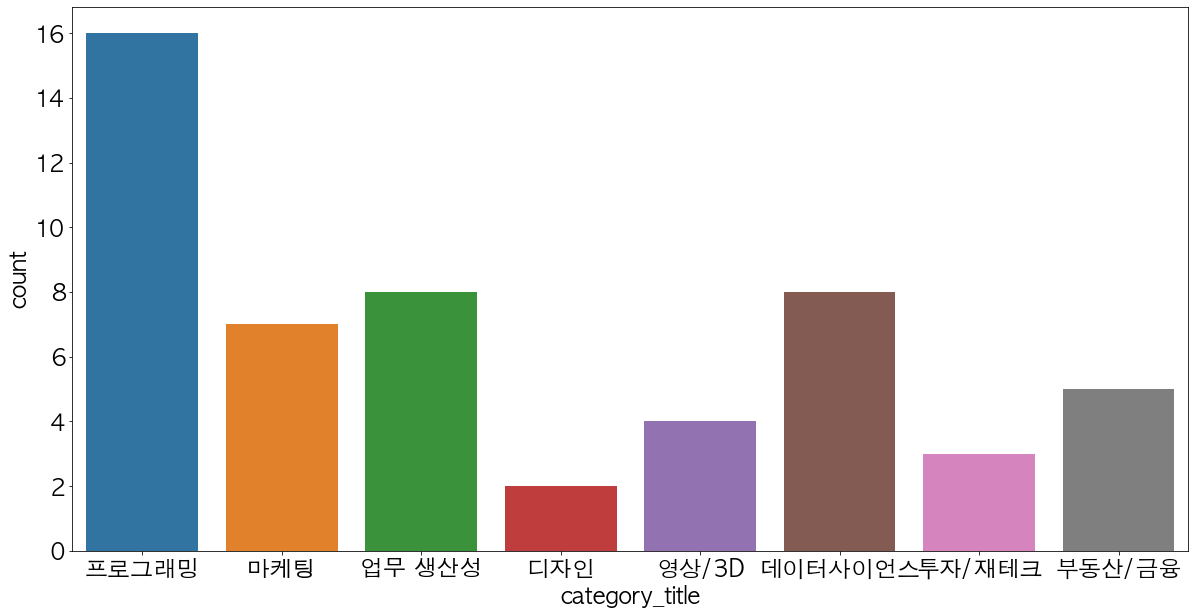

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(data=loyal_1, x='category_title')

scatterplot으로 시간에 따른 구매패턴을 파악해보았다.
* 4월 ~ 9월까지 다수의 강의 추가로 결제했고 뒤로갈 수록 더 많은 강의를 결제한 것으로 보아 패캠 강의에 대한 **만족도가 높다**고 추정할 수 있다.  
* 마케팅과 업무생산성 강의를 구매한 것을 시작으로 점차 카테고리 영역을 넓혀 강의를 수강한 것으로 보아 고객의 **관심사가 확장**된 것을 확인할 수 있다.  
특히 9월에서는 짧은 기간 내에 여러 개의 데이터 사이언스, 투자, 금융 분야의 강의를 여러개 결제한 것으로 보아 어느 정도 관심사가 굳혀졌음을 추정할 수 있다.  

이 고객을 단 한 명의 개인 고객으로 보았을 때는 위와 같은 것들을 추정해볼 수 있다.  
하지만 EDA를 시행한 데이터셋은 약 6개월 간의 데이터이고 개인이 6개월 동안 여러 카테고리 강의를  7백만원 이상 결제했다는 사실이 현실적으로 불가능하다고 생각했다. 그래서 한 가지 추정을 덧붙여보았다.  
**98685 고객이 B2B 고객이라면?**  
98685을 법인으로 보고 직원들에게 복지차원에서 강의를 제공해주는 것이라는 추정해 보았다.  
프로그래밍 강의를 제일 많이 수강했지만  프론트엔드, 백엔드, 앱개발, 웹 개발, 머신러닝 등의 강의를 수강하고 있기 때문에 관심있는 **분야를 특정할 수 없었다.** 따라서 여러 사람이 한 개의 customer_id로 수강하고 있을 거라는 가능성을 제시해보았다.   
***제안***  
* 더 많은 수강을 위해 ‘직장인’ 키워드가 있는 강의를 많이 노출시킨다.  
* B2B 대상 서비스 추천: 기업교육 서비스, 온라인 교육 구독 서비스 광고 노출





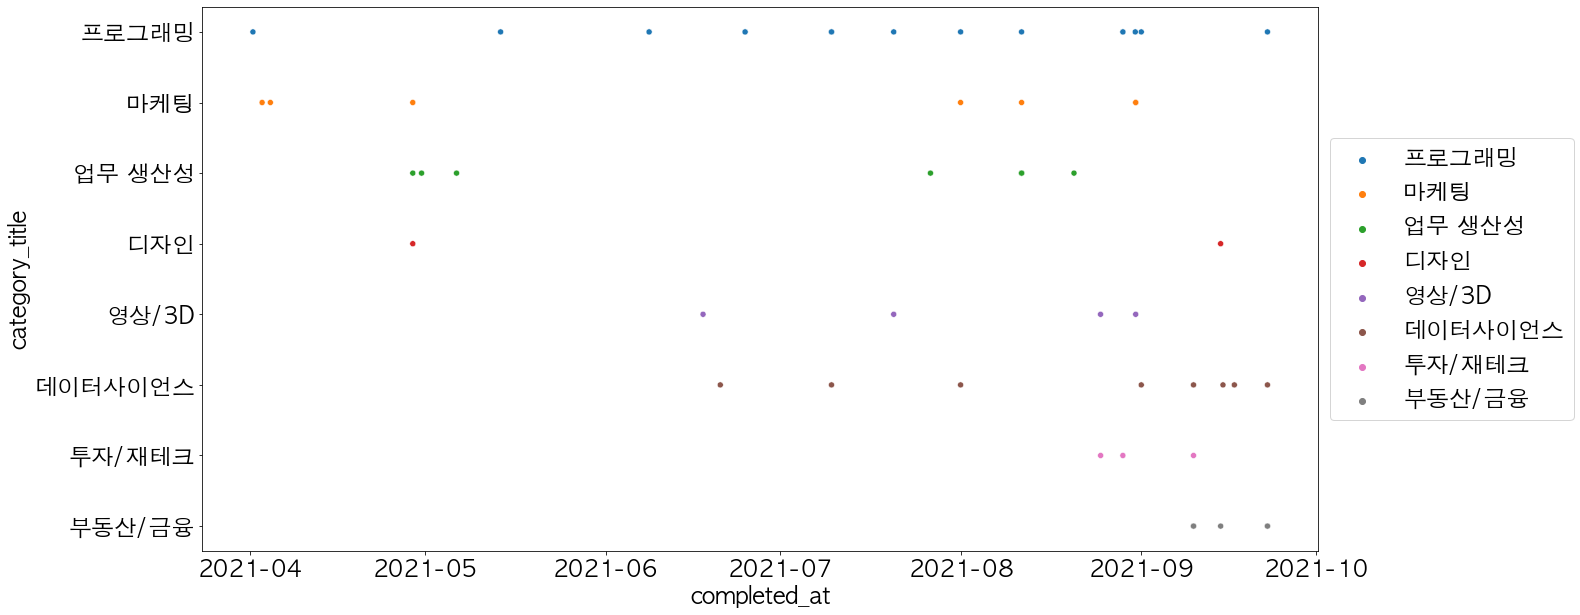

In [ ]:
sns.scatterplot(data=loyal_1, x="completed_at", y = "category_title", hue="category_title")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#sns.lineplot(x = "category_title", y = "completed_at", data = loyal1)

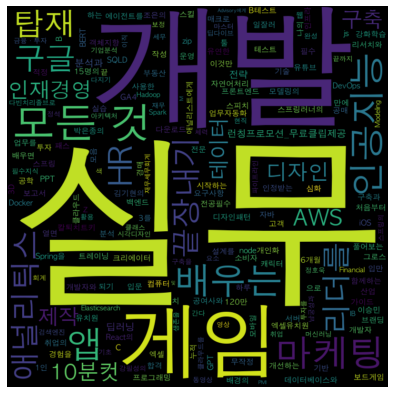

In [ ]:
text = " ".join(i for i in loyal_1['course_title'])
stopwords = set(STOPWORDS)
stopwords.add('올인원')
stopwords.add('초격차')
stopwords.add('패키지')
stopwords.add('번에')
stopwords.add('한번에')
stopwords.add('끝내는')
stopwords.add('한')
stopwords.add('RED')
stopwords.add('권오상의 금융 아카데미')
stopwords.add('아카데미')
stopwords.add('활용한')
stopwords.add('위한')
# img = Image.open(‘책_검은배경.jpeg’)
# img_array = np.array(img)
wordcloud = WordCloud(font_path='AppleGothic',
                      width=400,
                      height=400,
                      scale=2.0,
                      max_font_size=250,
#                       mask=img_array,
                      stopwords=stopwords).generate(text)
plt.figure( figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 50769 : 개발자를 꿈꾸는 취준 이직생
customer_id 50769은 2번째로 높은 transaction_amount를 가진 고객이다.  
총 40개의 강의를 총 4,514,110원에 수강했다.  
프로그래밍은 웹 개발, 앱 개발 강의 위주로 수강했고 마케팅과 금융 관련 강의도 다수 수강했다.  
이 고객도 1위 고객인 98685 고객처럼 관심 카테고리가 많지만 course_title을 보았을 때 주로 앱 개발과 웹 개발 강의를 주로 수강한 것으로 보아 앱, 웹 개발자를 목표로 공부를 하며 관심 분야가 다양한 고객이라고 유추해 보았다.  


In [ ]:
loyal_2 = df1[(df1['customer_id'] == 50769)]
loyal_2.iloc[:,[1,2,-2,-1]].value_counts().to_frame()

0
category_title course_title                                       transaction_amount completed_at          
데이터사이언스        The RED : 칼만필터를 활용한 자율주행 센서퓨전 기술 구현 by 조형기          209000            2021-07-08 23:36:04  1
               올인원 패키지 : 강필성의 머신러닝 아카데미                            104300            2021-07-25 21:58:57  1
투자/재테크         올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략      -319000            2021-08-09 14:29:59  1
               올인원 패키지 : 아파트 말고 부동산 재테크 시작하기                       150500            2021-04-30 22:18:46  1
               초격차 패키지 : 한 번에 끝내는 부동산 경매/공매                        129000            2021-08-31 23:51:37  1
프로그래밍          The RED : 고객 경험을 개선하는 A/B테스트 기반 모바일 앱 개발 by 이승민     125300            2021-09-04 09:41:23  1
               The RED : 백엔드 에센셜 : 대용량 서비스를 위한 아키텍처 with Redis...  219000            2021-08-31 23:58:25  1
               The RED : 조은의 프론트엔드 실무 가이드 : 요구사항 분석과 적정 기술         159000            2021-08-15 23:17:44  1
               [런칭프로모션_무료클립제공] 올인원 패키지 : 박은종의 객체지향 설계를 위한 디자인패...  89000             2021-06-30 06:36:08  1
               시크릿코드 : 프론트엔드 실무 완성편                                173160            2021-06-04 14:34:35  1
               올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & T...  89000             2021-04-30 21:26:24  1
               올인원 패키지 : 누적 다운로드 120만+ 1인 개발자와 함께하는 앱 개발 입문       -139000            2021-08-09 14:30:45  1
               올인원 패키지 : 파이썬 웹 개발                                  0                 2021-04-30 22:51:32  1
               초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift         169000            2021-07-25 22:16:23  1
               초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영            158000            2021-08-16 12:47:42  1
               초격차 패키지 : 한 번에 끝내는 React의 모든 것                      189000            2021-07-25 23:40:34  1
               초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                  79000             2021-05-23 23:46:23  1
               초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화            32000             2021-08-11 13:52:44  1
                                                                   149000            2021-07-25 20:02:15  1
지식콘텐츠          경영의 신: core MBA                                     239000            2021-06-22 20:44:27  1
영상/3D          편집하는여자의 영상편집 마스터클래스 - 제 2강 10가지 편집기법으로 프리미어 레벨업하기!  37000             2021-09-10 20:47:41  1
               올인원 패키지 : 아카데미 : 편집하는여자의 영상편집 마스터클래스 - 제 1강 프리미...  78400             2021-06-13 23:20:09  1
마케팅            초격차 패키지 : 무조건 팔리는 SNS콘텐츠 끝장내기                       130500            2021-07-31 23:12:51  1
데이터사이언스        올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리               9000              2021-08-11 13:42:20  1
               올인원 패키지 : 클라우드를 활용한 데이터 파이프라인 구축                    339150            2021-09-22 23:33:18  1
디자인            초격차 패키지 : 한 번에 끝내는 포토샵 활용                           119200            2021-06-30 06:56:55  1
               초격차 패키지 : 한번에 끝내는 UX/UI 디자인                         56000             2021-04-30 21:57:18  1
마케팅            REC.ON : 틱톡(TikTok)                                 3000              2021-06-07 12:37:44  1
               The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법              119000            2021-06-30 06:22:14  1
               올인원 패키지 : 데이터 기반 마케팅 21                             57400             2021-04-01 17:55:43  1
               초격차 패키지 : 한 번에 끝내는 디지털 마케팅                          0                 2021-09-10 22:13:58  1
영상/3D          The RED : 탑 아티스트가 선택한 디렉터 : 권오준이 알려주는 영상 연출의 모든 것   135200            2021-07-25 21:37:30  1
부동산/금융         부동산 디벨로퍼 아카데미 : 상업용/숙박용 부동산 개발 The Real             279000            2021-09-22 23:31:54  1
               올인원 패키지 : 권오상의 금융 아카데미 - 권오상 회계사의 자금조달 분석 및 가치평...  249000            2021-06-08 23:08:27  1
               올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초 (수강시간 제한)  225000            2021-04-30 21:46:58  1
               올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 심화 (수강시간 제한)  249900            2021-04-30 21:41:37  1
  

In [ ]:
print(loyal_2['category_title'].value_counts().sum(),'개 수강')
loyal_2['category_title'].value_counts().to_frame()

40 개 수강


category_title
프로그래밍                15
마케팅                   5
부동산/금융                5
데이터사이언스               4
투자/재테크                3
영상/3D                 3
디자인                   2
업무 생산성                2
지식콘텐츠                 1

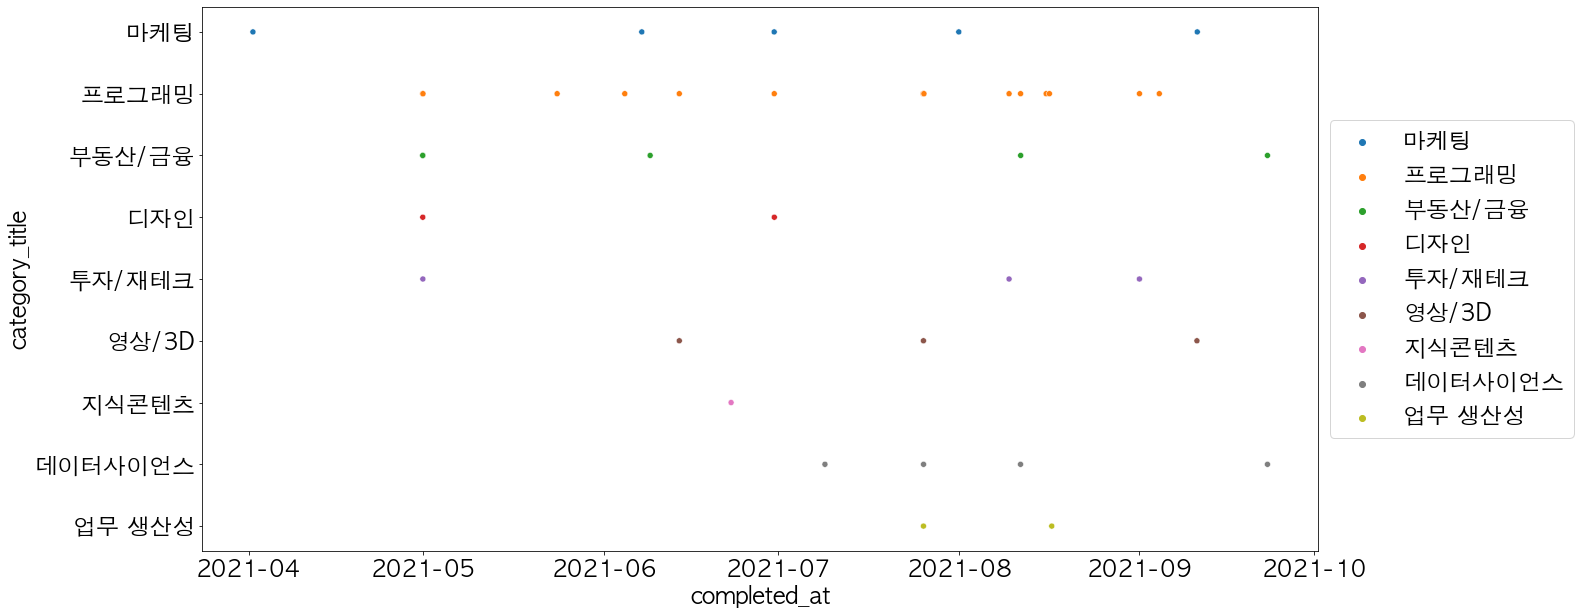

In [ ]:
sns.scatterplot(data=loyal_2, x="completed_at", y = "category_title", hue="category_title")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

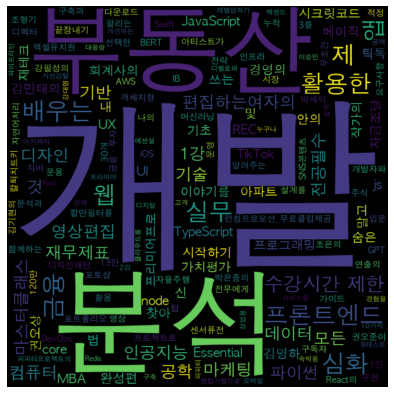

In [ ]:
text = " ".join(i for i in loyal_2['course_title'])
stopwords = set(STOPWORDS)
stopwords.add('올인원')
stopwords.add('초격차')
stopwords.add('패키지')
stopwords.add('번에')
stopwords.add('한번에')
stopwords.add('끝내는')
stopwords.add('한')
stopwords.add('RED')
stopwords.add('권오상의')
stopwords.add('아카데미')
stopwords.add('위한')
# img = Image.open(‘책_검은배경.jpeg’)
# img_array = np.array(img)
wordcloud = WordCloud(font_path='AppleGothic',
                      width=400,
                      height=400,
                      scale=2.0,
                      max_font_size=250,
#                       mask=img_array,
                      stopwords=stopwords).generate(text)
plt.figure( figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 538965: 프로일잘러 꿈꾸는 직장인
마지막으로 customer_id 538965은 B2C Loyal customer 중 10위 고객이다. 
강의 개수는 6개로 적은 편에 속하지만 프리패스 위주의 강의로 강의당 단가가 높다.(99만원 * 2개, 64만원)  
* 2일 만에 200만원 이상 결제한 것으로 보아 학습에 대한 의지가 커보인다.  
* 업무자동화나 직장인 필수스킬 프리패스를 수강하는 것으로 보아 업무를 효율적으로 처리하는 것에 관심이 많아 보인다.  
* 데이터 분석가 또는 웹 개발자로의 커리어 전환을 모색하고 있는 직장인으로 추정할 수 있다.



In [ ]:
loyal_10 = df1[(df1['customer_id'] == 538965)]
loyal_10.iloc[:,[1,2,-2,-1]].value_counts().to_frame()

0
category_title course_title                                       transaction_amount completed_at          
데이터사이언스        프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 :  삼성... 990000             2021-05-24 13:28:17  1
업무 생산성         올인원 패키지 : 6개월 치 업무를 하루 만에 끝내는 업무자동화                109000             2021-05-23 17:15:12  1
               프로모션 : 워라밸을 완성하는 직장인 필수스킬 프리패스 (5월 삼성 패키지 현물 : ... 990000             2021-05-23 17:22:25  1
프로그래밍          초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발                        99000              2021-06-29 18:11:09  1
               프로모션 : 개발자를 위한 코딩 만능 백과사전 PASS (6월 프리패스)           640000             2021-06-01 15:11:24  1
               합격 패스 : 정보처리기사 필기&실기                               9900               2021-06-25 01:47:20  1

In [ ]:
print(loyal_10['category_title'].value_counts().sum(),'개 수강')
loyal_10['category_title'].value_counts().to_frame()

6 개 수강


category_title
프로그래밍                 3
업무 생산성                2
데이터사이언스               1

# Popular categories of Top10
* 다른 카테고리 강의와 비교했을 때 프로그래밍 강의 결제가 압도적으로 많았다.    
-> Top10 고객의 wordcloud를 보면 대부분 '개발'이라는 단어가 중요한 키워드로 표현되어있음을 확인할 수 있다.   
* 우량 고객의 경우 여러 개의 카테고리 강의를 수강한다. 대부분 프로그래밍 강의로 시작하여 점차 다른 카테고리로 확장하는 양상을 보인다.

In [13]:
# TOP 10에게 가장 인기가 많은 카테고리는 무엇인지

# 1. TOP 10의 data frame 따로 만들기
Top10 = df1[(df1['customer_id'] == 98685) | (df1['customer_id'] == 50769) | (df1['customer_id'] == 40783) 
    | (df1['customer_id'] == 72501) | (df1['customer_id'] == 20784) | (df1['customer_id'] == 65665)
   | (df1['customer_id'] == 631) | (df1['customer_id'] == 417924) | (df1['customer_id'] == 6526) | (df1['customer_id'] == 538965)]

Top10.groupby('customer_id').describe()

transaction_amount                                          \
                         count           mean            std       min   
customer_id                                                              
631.0                     19.0  155684.210526   44749.689796   97000.0   
6526.0                    22.0  130288.636364   97725.926194       0.0   
20784.0                   27.0  110668.518519  119395.431516 -209000.0   
40783.0                   33.0  132224.090909  118464.966192       0.0   
50769.0                   40.0  112852.750000  114312.527164 -319000.0   
65665.0                   27.0  109588.888889   54668.450565       0.0   
72501.0                   21.0  158454.761905   71399.831766       0.0   
98685.0                   53.0  132844.339623   91502.888595       0.0   
417924.0                  19.0  153015.789474  102120.583751  -33000.0   
538965.0                   6.0  472983.333333  458104.924299    9900.0   

                                                     
                  25%       50%       75%       max  
customer_id                                          
631.0        115650.0  169000.0  178200.0  259000.0  
6526.0        69775.0  114750.0  174412.5  339000.0  
20784.0       58750.0  111300.0  156550.0  399000.0  
40783.0       74500.0  126000.0  154000.0  640000.0  
50769.0       66325.0  122250.0  170040.0  339150.0  
65665.0       81900.0  118300.0  141250.0  199000.0  
72501.0      119000.0  149000.0  199000.0  339150.0  
98685.0       79000.0  129000.0  158400.0  399000.0  
417924.0      94000.0  159000.0  190250.0  399000.0  
538965.0     101500.0  374500.0  902500.0  990000.0

In [14]:
# groupby 참조: https://rfriend.tistory.com/383



category_title_count = Top10['category_title']#.groupby(Top10['customer_id'])
category_title_count1 = category_title_count.value_counts().to_frame().reset_index()
category_title_count1.columns=['category_title', 'total']
category_title_count1 #['category_title']

print(len(category_title_count),'개 수강')

267 개 수강


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_

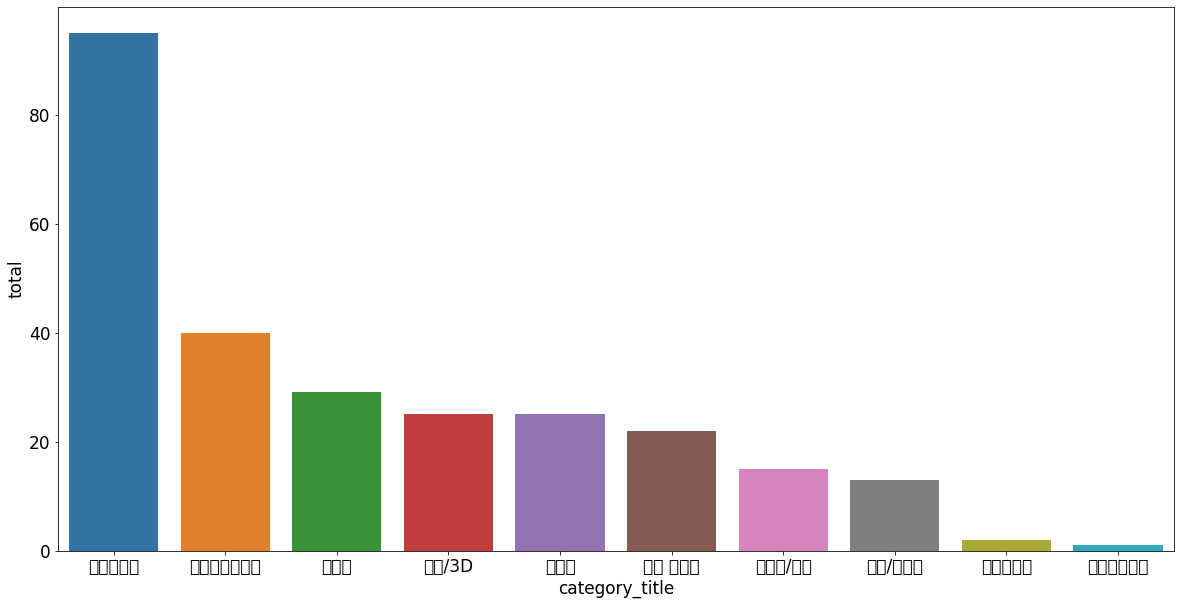

In [15]:
plt.figure(figsize=(20, 10))
plt.rcParams['font.size'] = 17
sns.barplot(data =category_title_count1, x='category_title', y = 'total')

plt.show()

**프로그래밍(95) > 데이터사이언스(40) > 마케팅(29) > 영상/3D = 디자인(25) > 업무 생산성(22) > 부동산/금융(15) > 투자/재테크(13) > 기타(3)**